# 学习记录 & 疑问 & 草稿本

记录课程视频的代码实现


## 9.感知器技巧

画直线

4.082525855311217


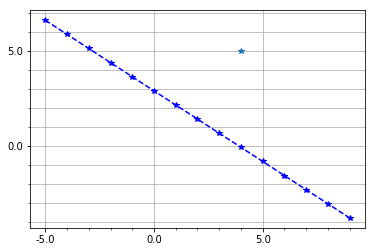

In [15]:
## https://blog.csdn.net/fortware/article/details/51934814

from pylab import *  
from matplotlib.ticker import MultipleLocator, FormatStrFormatter  
  
xmajorLocator   = MultipleLocator(5) #将x主刻度标签设置为20的倍数  
xmajorFormatter = FormatStrFormatter('%1.1f') #设置x轴标签文本的格式  
xminorLocator   = MultipleLocator(1) #将x轴次刻度标签设置为5的倍数  
  
ymajorLocator   = MultipleLocator(5) #将y轴主刻度标签设置为0.5的倍数  
ymajorFormatter = FormatStrFormatter('%1.1f') #设置y轴标签文本的格式  
yminorLocator   = MultipleLocator(1) #将此y轴次刻度标签设置为0.1的倍数  

w1 = 2.6
w2 = 3.5
b = -10.1
x1 = arange(-5.0, 10.0, 1)  
x2 = -(w1 * x1 + b) / w2
x = 4
y = 5

ax = subplot(111) #注意:一般都在ax中设置,不再plot中设置  
plot(x1,x2,'--b*')  

plot(x,y,'*')

d = abs(w1 * x + w2 * y +b)/(w1**2 + w2**2)**0.5
print(d)

#设置主刻度标签的位置,标签文本的格式  
ax.xaxis.set_major_locator(xmajorLocator)  
ax.xaxis.set_major_formatter(xmajorFormatter)  
  
ax.yaxis.set_major_locator(ymajorLocator)  
ax.yaxis.set_major_formatter(ymajorFormatter)  
  
#显示次刻度标签的位置,没有标签文本  
ax.xaxis.set_minor_locator(xminorLocator)  
ax.yaxis.set_minor_locator(yminorLocator)  
  
ax.xaxis.grid(True, which='major') #x坐标轴的网格使用主刻度  
ax.yaxis.grid(True, which='minor') #y坐标轴的网格使用次刻度  
  
show()  

### 疑问（已解决）

对于斜率为负的直线，让其往上和往下靠近点的做法是，减去和加上点的坐标×学习速度，这个好理解，但是对于斜率大于0的直线，怎么使其靠近目标点？

    >解决：考虑直线的上方下方

## 10.在感知器算法中查询的几个 函数

np.matmul(a,b,out=None)

np.arange

np.dtype

np.reshape

np.ravel

np.swapaxes(__存疑__）

Docstring:
matmul(a, b, out=None)

Matrix product of two arrays.

The behavior depends on the arguments in the following way.

- If both arguments are 2-D they are multiplied like conventional
  matrices.
- If either argument is N-D, N > 2, it is treated as a stack of
  matrices residing in the last two indexes and broadcast accordingly.__(试一试)__
- If the first argument is 1-D, it is promoted to a matrix by
  prepending a 1 to its dimensions. After matrix multiplication
  the prepended 1 is removed.
- If the second argument is 1-D, it is promoted to a matrix by
  appending a 1 to its dimensions. After matrix multiplication
  the appended 1 is removed.

Multiplication by a scalar is not allowed, use ``*`` instead. Note that
multiplying a stack of matrices with a vector will result in a stack of
vectors, but matmul will not recognize it as such.

``matmul`` differs from ``dot`` in two important ways.

- Multiplication by scalars is not allowed.
- Stacks of matrices are broadcast together as if the matrices
  were elements.

.. warning::
   This function is preliminary and included in NumPy 1.10.0 for testing
   and documentation. Its semantics will not change, but the number and
   order of the optional arguments will.

.. versionadded:: 1.10.0

Parameters
----------
a : array_like
    First argument.
b : array_like
    Second argument.
out : ndarray, optional
    Output argument. This must have the exact kind that would be returned
    if it was not used. In particular, it must have the right type, must be
    C-contiguous, and its dtype must be the dtype that would be returned
    for `dot(a,b)`. This is a performance feature. Therefore, if these
    conditions are not met, an exception is raised, instead of attempting
    to be flexible.

Returns
-------
output : ndarray
    Returns the dot product of `a` and `b`.  If `a` and `b` are both
    1-D arrays then a scalar is returned; otherwise an array is
    returned.  If `out` is given, then it is returned.

Raises
------
ValueError
    If the last dimension of `a` is not the same size as
    the second-to-last dimension of `b`.

    If scalar value is passed.

See Also
--------
vdot : Complex-conjugating dot product.
tensordot : Sum products over arbitrary axes.
einsum : Einstein summation convention.
dot : alternative matrix product with different broadcasting rules.

Notes
-----
The matmul function implements the semantics of the `@` operator introduced
in Python 3.5 following PEP465.

Examples
--------
For 2-D arrays it is the matrix product:

/>>> a = [[1, 0], [0, 1]]
/>>> b = [[4, 1], [2, 2]]
/>>> np.matmul(a, b)
/array([[4, 1],
       [2, 2]])

For 2-D mixed with 1-D, the result is the usual.

/>>> a = [[1, 0], [0, 1]]
/>>> b = [1, 2] __（把方阵用1补齐了）__
/>>> np.matmul(a, b)
/array([1, 2])
/>>> np.matmul(b, a)
/array([1, 2])


Broadcasting is conventional for stacks of arrays

/>>> a = np.arange(2*2*4).reshape((2,2,4))__（查意思）__
/>>> b = np.arange(2*2*4).reshape((2,4,2))
/>>> np.matmul(a,b).shape
/(2, 2, 2)
/>>> np.matmul(a,b)[0,1,1]
98
/>>> sum(a[0,1,:] * b[0,:,1])
98

Vector, vector returns the scalar inner product, but neither argument
is complex-conjugated:

/>>> np.matmul([2j, 3j], [2j, 3j])
(-13+0j)

Scalar multiplication raises an error.

/>>> np.matmul([1,2], 3)
Traceback (most recent call last):
...
ValueError: Scalar operands are not allowed, use '*' instead
Type:      builtin_function_or_method

In [6]:
a = [[1,0],[0,1]]
b = [[1,2],[1,1]]
np.matmul(a,b)

array([[1, 2],
       [1, 1]])

In [20]:
 a = np.arange(2*2*4*2).reshape((4,2,4,1))
print(a)

[[[[ 0]
   [ 1]
   [ 2]
   [ 3]]

  [[ 4]
   [ 5]
   [ 6]
   [ 7]]]


 [[[ 8]
   [ 9]
   [10]
   [11]]

  [[12]
   [13]
   [14]
   [15]]]


 [[[16]
   [17]
   [18]
   [19]]

  [[20]
   [21]
   [22]
   [23]]]


 [[[24]
   [25]
   [26]
   [27]]

  [[28]
   [29]
   [30]
   [31]]]]


Docstring:
arange([start,] stop[, step,], dtype=None)

Return evenly spaced values within a given interval.

Values are generated within the half-open interval ``[start, stop)``
(in other words, the interval including `start` but excluding `stop`).
For integer arguments the function is equivalent to the Python built-in
`range <http://docs.python.org/lib/built-in-funcs.html>`_ function,
but returns an ndarray rather than a list.

When using a non-integer step, such as 0.1, the results will often not
be consistent.  It is better to use ``linspace`` for these cases.

Parameters
----------
start : number, optional
    Start of interval.  The interval includes this value.  The default
    start value is 0.
stop : number
    End of interval.  The interval does not include this value, except
    in some cases where `step` is not an integer and floating point
    round-off affects the length of `out`.
step : number, optional
    Spacing between values.  For any output `out`, this is the distance
    between two adjacent values, ``out[i+1] - out[i]``.  The default
    step size is 1.  If `step` is specified, `start` must also be given.
dtype : dtype
    The type of the output array.  If `dtype` is not given, infer the data
    type from the other input arguments.

Returns
-------
arange : ndarray
    Array of evenly spaced values.

    For floating point arguments, the length of the result is
    ``ceil((stop - start)/step)``.  Because of floating point overflow,
    this rule may result in the last element of `out` being greater
    than `stop`.

See Also
--------
linspace : Evenly spaced numbers with careful handling of endpoints.
ogrid: Arrays of evenly spaced numbers in N-dimensions.
mgrid: Grid-shaped arrays of evenly spaced numbers in N-dimensions.

Examples
--------
>>> np.arange(3)
array([0, 1, 2])
>>> np.arange(3.0)
array([ 0.,  1.,  2.])
>>> np.arange(3,7)
array([3, 4, 5, 6])
>>> np.arange(3,7,2)
array([3, 5])
Type:      builtin_function_or_method

In [12]:
np.arange(2*2*4)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

Init signature: np.dtype(self, /, *args, **kwargs)
Docstring:     
dtype(obj, align=False, copy=False)

Create a data type object.

A numpy array is homogeneous, and contains elements described by a
dtype object. A dtype object can be constructed from different
combinations of fundamental numeric types.

Parameters
----------
obj
    Object to be converted to a data type object.
align : bool, optional
    Add padding to the fields to match what a C compiler would output
    for a similar C-struct. Can be ``True`` only if `obj` is a dictionary
    or a comma-separated string. If a struct dtype is being created,
    this also sets a sticky alignment flag ``isalignedstruct``.
copy : bool, optional
    Make a new copy of the data-type object. If ``False``, the result
    may just be a reference to a built-in data-type object.

See also
--------
result_type

Examples
--------
Using array-scalar type:

>>> np.dtype(np.int16)
dtype('int16')

Structured type, one field name 'f1', containing int16:

>>> np.dtype([('f1', np.int16)])
dtype([('f1', '<i2')])

Structured type, one field named 'f1', in itself containing a structured
type with one field:

>>> np.dtype([('f1', [('f1', np.int16)])])
dtype([('f1', [('f1', '<i2')])])

Structured type, two fields: the first field contains an unsigned int, the
second an int32:

>>> np.dtype([('f1', np.uint), ('f2', np.int32)])
dtype([('f1', '<u4'), ('f2', '<i4')])

Using array-protocol type strings:

>>> np.dtype([('a','f8'),('b','S10')])
dtype([('a', '<f8'), ('b', '|S10')])

Using comma-separated field formats.  The shape is (2,3):

>>> np.dtype("i4, (2,3)f8")
dtype([('f0', '<i4'), ('f1', '<f8', (2, 3))])

Using tuples.  ``int`` is a fixed type, 3 the field's shape.  ``void``
is a flexible type, here of size 10:

>>> np.dtype([('hello',(np.int,3)),('world',np.void,10)])
dtype([('hello', '<i4', 3), ('world', '|V10')])

Subdivide ``int16`` into 2 ``int8``'s, called x and y.  0 and 1 are
the offsets in bytes:

>>> np.dtype((np.int16, {'x':(np.int8,0), 'y':(np.int8,1)}))
dtype(('<i2', [('x', '|i1'), ('y', '|i1')]))

Using dictionaries.  Two fields named 'gender' and 'age':

>>> np.dtype({'names':['gender','age'], 'formats':['S1',np.uint8]})
dtype([('gender', '|S1'), ('age', '|u1')])

Offsets in bytes, here 0 and 25:

>>> np.dtype({'surname':('S25',0),'age':(np.uint8,25)})
dtype([('surname', '|S25'), ('age', '|u1')])
File:           c:\users\vanch\anaconda3\lib\site-packages\numpy\__init__.py
Type:           type

Signature: np.reshape(a, newshape, order='C')
Docstring:
Gives a new shape to an array without changing its data.

Parameters
----------
a : array_like
    Array to be reshaped.
newshape : int or tuple of ints
    The new shape should be compatible with the original shape. If
    an integer, then the result will be a 1-D array of that length.
    One shape dimension can be -1. In this case, the value is
    inferred from the length of the array and remaining dimensions.
order : {'C', 'F', 'A'}, optional
    Read the elements of `a` using this index order, and place the
    elements into the reshaped array using this index order.  'C'
    means to read / write the elements using C-like index order,
    with the last axis index changing fastest, back to the first
    axis index changing slowest. 'F' means to read / write the
    elements using Fortran-like index order, with the first index
    changing fastest, and the last index changing slowest. Note that
    the 'C' and 'F' options take no account of the memory layout of
    the underlying array, and only refer to the order of indexing.
    'A' means to read / write the elements in Fortran-like index
    order if `a` is Fortran *contiguous* in memory, C-like order
    otherwise.

Returns
-------
reshaped_array : ndarray
    This will be a new view object if possible; otherwise, it will
    be a copy.  Note there is no guarantee of the *memory layout* (C- or
    Fortran- contiguous) of the returned array.

See Also
--------
ndarray.reshape : Equivalent method.

Notes
-----
It is not always possible to change the shape of an array without
copying the data. If you want an error to be raise if the data is copied,
you should assign the new shape to the shape attribute of the array::

 >>> a = np.zeros((10, 2))
 # A transpose make the array non-contiguous
 >>> b = a.T
 # Taking a view makes it possible to modify the shape without modifying
 # the initial object.
 >>> c = b.view()
 >>> c.shape = (20)
 AttributeError: incompatible shape for a non-contiguous array

The `order` keyword gives the index ordering both for *fetching* the values
from `a`, and then *placing* the values into the output array.
For example, let's say you have an array:

>>> a = np.arange(6).reshape((3, 2))
>>> a
array([[0, 1],
       [2, 3],
       [4, 5]])

You can think of reshaping as first raveling the array (using the given
index order), then inserting the elements from the raveled array into the
new array using the same kind of index ordering as was used for the
raveling.

>>> np.reshape(a, (2, 3)) # C-like index ordering
array([[0, 1, 2],
       [3, 4, 5]])
>>> np.reshape(np.ravel(a), (2, 3)) # equivalent to C ravel then C reshape
array([[0, 1, 2],
       [3, 4, 5]])
>>> np.reshape(a, (2, 3), order='F') # Fortran-like index ordering
array([[0, 4, 3],
       [2, 1, 5]])
>>> np.reshape(np.ravel(a, order='F'), (2, 3), order='F')
array([[0, 4, 3],
       [2, 1, 5]])

Examples
--------
>>> a = np.array([[1,2,3], [4,5,6]])
>>> np.reshape(a, 6)
array([1, 2, 3, 4, 5, 6])
>>> np.reshape(a, 6, order='F')
array([1, 4, 2, 5, 3, 6])

>>> np.reshape(a, (3,-1))       # the unspecified value is inferred to be 2
array([[1, 2],
       [3, 4],
       [5, 6]])
File:      c:\users\vanch\anaconda3\lib\site-packages\numpy\core\fromnumeric.py
Type:      function

Signature: np.ravel(a, order='C')
Docstring:
Return a contiguous flattened array.

A 1-D array, containing the elements of the input, is returned.  A copy is
made only if needed.

As of NumPy 1.10, the returned array will have the same type as the input
array. (for example, a masked array will be returned for a masked array
input)

Parameters
----------
a : array_like
    Input array.  The elements in `a` are read in the order specified by
    `order`, and packed as a 1-D array.
order : {'C','F', 'A', 'K'}, optional

    The elements of `a` are read using this index order. 'C' means
    to index the elements in row-major, C-style order,
    with the last axis index changing fastest, back to the first
    axis index changing slowest.  'F' means to index the elements
    in column-major, Fortran-style order, with the
    first index changing fastest, and the last index changing
    slowest. Note that the 'C' and 'F' options take no account of
    the memory layout of the underlying array, and only refer to
    the order of axis indexing.  'A' means to read the elements in
    Fortran-like index order if `a` is Fortran *contiguous* in
    memory, C-like order otherwise.  'K' means to read the
    elements in the order they occur in memory, except for
    reversing the data when strides are negative.  By default, 'C'
    index order is used.

Returns
-------
y : array_like
    If `a` is a matrix, y is a 1-D ndarray, otherwise y is an array of
    the same subtype as `a`. The shape of the returned array is
    ``(a.size,)``. Matrices are special cased for backward
    compatibility.

See Also
--------
ndarray.flat : 1-D iterator over an array.
ndarray.flatten : 1-D array copy of the elements of an array
                  in row-major order.
ndarray.reshape : Change the shape of an array without changing its data.

Notes
-----
In row-major, C-style order, in two dimensions, the row index
varies the slowest, and the column index the quickest.  This can
be generalized to multiple dimensions, where row-major order
implies that the index along the first axis varies slowest, and
the index along the last quickest.  The opposite holds for
column-major, Fortran-style index ordering.

When a view is desired in as many cases as possible, ``arr.reshape(-1)``
may be preferable.

Examples
--------
It is equivalent to ``reshape(-1, order=order)``.

>>> x = np.array([[1, 2, 3], [4, 5, 6]])
>>> print(np.ravel(x))
[1 2 3 4 5 6]

>>> print(x.reshape(-1))
[1 2 3 4 5 6]

>>> print(np.ravel(x, order='F'))
[1 4 2 5 3 6]

When ``order`` is 'A', it will preserve the array's 'C' or 'F' ordering:

>>> print(np.ravel(x.T))
[1 4 2 5 3 6]
>>> print(np.ravel(x.T, order='A'))
[1 2 3 4 5 6]

When ``order`` is 'K', it will preserve orderings that are neither 'C'
nor 'F', but won't reverse axes:

>>> a = np.arange(3)[::-1]; a
array([2, 1, 0])
>>> a.ravel(order='C')
array([2, 1, 0])
>>> a.ravel(order='K')
array([2, 1, 0])

>>> a = np.arange(12).reshape(2,3,2).swapaxes(1,2); a
array([[[ 0,  2,  4],
        [ 1,  3,  5]],
       [[ 6,  8, 10],
        [ 7,  9, 11]]])
>>> a.ravel(order='C')
array([ 0,  2,  4,  1,  3,  5,  6,  8, 10,  7,  9, 11])
>>> a.ravel(order='K')
array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])
File:      c:\users\vanch\anaconda3\lib\site-packages\numpy\core\fromnumeric.py
Type:      function

Signature: np.swapaxes(a, axis1, axis2)
Docstring:
Interchange two axes of an array.
__把0-7的8个数字放在立方体的顶点上，做swapaxes变换。生成: a = np.arange(8).reshape(2,2,2)，这其中，轴的方向可以测试出来：01为2轴，02为1轴，04为0轴，输出时，按照0、1、2的顺序从大往小建表。0轴由表中最大的两个表构成，这两个表的方向就是0轴，1轴由上面次大表中的最大的两个表构成，也是按照表中俩个表的方向表示，以此类推得到其他剩下的轴的方向。

__交换轴向时，因为除了交换的轴，其他轴的位置都没变，所以其他轴向的表不会发生变化

Parameters
----------
a : array_like
    Input array.
axis1 : int
    First axis.
axis2 : int
    Second axis.

Returns
-------
a_swapped : ndarray
    For NumPy >= 1.10.0, if `a` is an ndarray, then a view of `a` is
    returned; otherwise a new array is created. For earlier NumPy
    versions a view of `a` is returned only if the order of the
    axes is changed, otherwise the input array is returned.

Examples
--------
>>> x = np.array([[1,2,3]])
>>> np.swapaxes(x,0,1)
array([[1],
       [2],
       [3]])

>>> x = np.array([[[0,1],[2,3]],[[4,5],[6,7]]])
>>> x
array([[[0, 1],
        [2, 3]],
       [[4, 5],
        [6, 7]]])

>>> np.swapaxes(x,0,2)
array([[[0, 4],
        [2, 6]],
       [[1, 5],
        [3, 7]]])
File:      c:\users\vanch\anaconda3\lib\site-packages\numpy\core\fromnumeric.py
Type:      function

In [59]:
x = np.array([[[0,1],[2,3]],[[4,5],[6,7]]]);x
print(x)
np.swapaxes(x,0,2)

[[[0 1]
  [2 3]]

 [[4 5]
  [6 7]]]


array([[[0, 4],
        [2, 6]],

       [[1, 5],
        [3, 7]]])

In [62]:
a = np.arange(16).reshape(2,2,2,2)
print(a)
a.swapaxes(0,3)

[[[[ 0  1]
   [ 2  3]]

  [[ 4  5]
   [ 6  7]]]


 [[[ 8  9]
   [10 11]]

  [[12 13]
   [14 15]]]]


array([[[[ 0,  8],
         [ 2, 10]],

        [[ 4, 12],
         [ 6, 14]]],


       [[[ 1,  9],
         [ 3, 11]],

        [[ 5, 13],
         [ 7, 15]]]])

## 15 多类别分类和Softmax函数

Call signature:  np.divide(*args, **kwargs)
Type:            ufunc
String form:     <ufunc 'true_divide'>
File:            c:\users\vanch\anaconda3\lib\site-packages\numpy\__init__.py
Docstring:      
true_divide(x1, x2, /, out=None, *, where=True, casting='same_kind', order='K', dtype=None, subok=True[, signature, extobj])

Returns a true division of the inputs, element-wise.

Instead of the Python traditional 'floor division', this returns a true
division.  True division adjusts the output type to present the best
answer, regardless of input types.

Parameters
----------
x1 : array_like
    Dividend array.
x2 : array_like
    Divisor array.
out : ndarray, None, or tuple of ndarray and None, optional
    A location into which the result is stored. If provided, it must have
    a shape that the inputs broadcast to. If not provided or `None`,
    a freshly-allocated array is returned. A tuple (possible only as a
    keyword argument) must have length equal to the number of outputs.
where : array_like, optional
    Values of True indicate to calculate the ufunc at that position, values
    of False indicate to leave the value in the output alone.
**kwargs
    For other keyword-only arguments, see the
    :ref:`ufunc docs <ufuncs.kwargs>`.

Returns
-------
out : ndarray
    Result is scalar if both inputs are scalar, ndarray otherwise.

Notes
-----
The floor division operator ``//`` was added in Python 2.2 making
``//`` and ``/`` equivalent operators.  The default floor division
operation of ``/`` can be replaced by true division with ``from
__future__ import division``.

In Python 3.0, ``//`` is the floor division operator and ``/`` the
true division operator.  The ``true_divide(x1, x2)`` function is
equivalent to true division in Python.

Examples
--------
>>> x = np.arange(5)
>>> np.true_divide(x, 4)
array([ 0.  ,  0.25,  0.5 ,  0.75,  1.  ])

>>> x/4
array([0, 0, 0, 0, 1])
>>> x//4
array([0, 0, 0, 0, 1])

>>> from __future__ import division
>>> x/4
array([ 0.  ,  0.25,  0.5 ,  0.75,  1.  ])
>>> x//4
array([0, 0, 0, 0, 1])
Class docstring:
Functions that operate element by element on whole arrays.

To see the documentation for a specific ufunc, use `info`.  For
example, ``np.info(np.sin)``.  Because ufuncs are written in C
(for speed) and linked into Python with NumPy's ufunc facility,
Python's help() function finds this page whenever help() is called
on a ufunc.

A detailed explanation of ufuncs can be found in the docs for :ref:`ufuncs`.

Calling ufuncs:
===============

op(*x[, out], where=True, **kwargs)
Apply `op` to the arguments `*x` elementwise, broadcasting the arguments.

The broadcasting rules are:

* Dimensions of length 1 may be prepended to either array.
* Arrays may be repeated along dimensions of length 1.

Parameters
----------
*x : array_like
    Input arrays.
out : ndarray, None, or tuple of ndarray and None, optional
    Alternate array object(s) in which to put the result; if provided, it
    must have a shape that the inputs broadcast to. A tuple of arrays
    (possible only as a keyword argument) must have length equal to the
    number of outputs; use `None` for outputs to be allocated by the ufunc.
where : array_like, optional
    Values of True indicate to calculate the ufunc at that position, values
    of False indicate to leave the value in the output alone.
**kwargs
    For other keyword-only arguments, see the :ref:`ufunc docs <ufuncs.kwargs>`.

Returns
-------
r : ndarray or tuple of ndarray
    `r` will have the shape that the arrays in `x` broadcast to; if `out` is
    provided, `r` will be equal to `out`. If the function has more than one
    output, then the result will be a tuple of arrays.

## 19 交叉熵1 cross entropy

把乘积取个对数，看成是各个元素取对数后相加，因为概率小于1，会得到负的和，故最后取个绝对值。即：乘积，取对数，变正数

交叉熵大的匹配度不好（误差大）

我们遇到了某种规律，概率和误差函数之间肯定有一定的联系，这种联系叫做交叉熵。这个概念在很多领域都非常流行，包括机器学习领域。我们将详细了解该公式，并编写代码！

## 23 梯度下降

这节是编程，理论在19-22节中，交叉熵：输入一个一个点的概率，得到不同情况组合的误差结果，用误差函数优化模型参数。

### 1 计算误差函数：

对于一个点来说，计算分为两部分，一是计算概率，即把权重和点的值带入σ函数，二是由概率得到的误差程度，即-ln(P)。

把所有的点的误差相加就得到了误差函数。这个函数的变量是用于计算概率的__权重__，即Wi和b。

### 2 用梯度计算来最小化误差程度

这节内容在网页上很详细

## 30 非线性模型 31 神经网络结构

30 两条线，按不同权重划分区域，形成了非线性的划分线。

31 神经网络结构可以很复杂，多层级和多类别分类是其复杂的特点。

## 32 向前反馈 33 反向传播

32 因为初始预测的划分线一般不会太准确，故而需要对结果进行判断后，1或调整x1/x2对几个1级模型的权重，2或调整几个1级模型到后面结果的权重

和之前一样，神经网络将产生误差函数（这个是构建模型），最终需要最小化误差函数（这个是优化模型）。

预测$$\hat{y} = \sigma(w_1 x_1 + w_2 x_2 + b)$$（这个是1层模型）

误差函数$$Error(y, \hat{y}) = - y \log(\hat{y}) - (1-y) \log(1-\hat{y})$$

33 现在，我们准备好训练神经网络了。为此，我们将使用一种方法，叫做反向传播。简而言之，反向传播将包括：

进行前向反馈运算。
将模型的输出与期望的输出进行比较。
计算误差。
向后运行前向反馈运算（反向传播），将误差分散到每个权重上。
更新权重，并获得更好的模型。
继续此流程，直到获得很好的模型。
听起来比较复杂，实际上要简单些。

主要是__链式法则__

In [4]:
import numpy as np
import pandas as pd
?pd.concat